In [1]:
#import packages
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

In [2]:
x = torch.linspace(-1, 1, 400) #define the x
x = torch.unsqueeze(x, 1) #reshape x
y = (np.sign(np.sin(5*np.pi*x))) #define the non linear sin function

length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent variable')

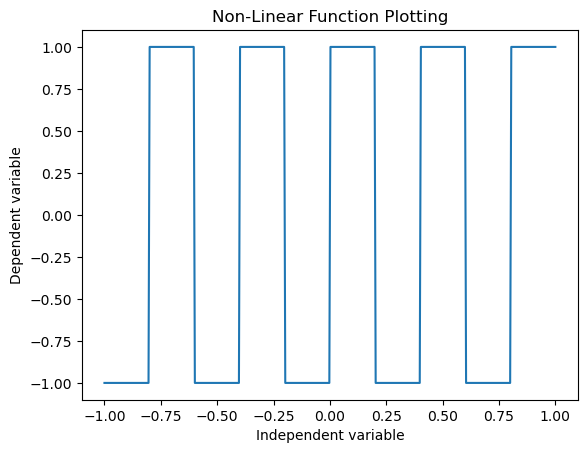

In [3]:
print('length of x:',x.shape)
print('length of y:',y.shape)
plt.plot(x, y)
plt.title('Non-Linear Function Plotting')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

In [27]:
class DNN1(nn.Module): #define the deep neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 5)   #7 hidden layer
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 9)
        self.hiddenlayer7 = nn.Linear(9, 5)

        self.output = nn.Linear(5, 1)   #1 output layer

    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))

        x = self.output(x)            
        return x     
        

model1 = DNN1() #defining the model

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in DNN Model 1:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model1.state_dict():
    print(par, "\t",model1.state_dict()[par])

Number of parameters in DNN Model 1: 555

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.1180],
        [-0.3108],
        [ 0.7128],
        [ 0.7030],
        [-0.3684]])
hiddenlayer1.bias 	 tensor([ 0.9287, -0.4887, -0.4342,  0.1719, -0.1735])
hiddenlayer2.weight 	 tensor([[-0.3313,  0.2683,  0.3019, -0.2389, -0.0310],
        [-0.0940,  0.2129, -0.4093, -0.1051, -0.0525],
        [-0.4393, -0.1505,  0.4383,  0.2909,  0.1465],
        [ 0.2321,  0.4100,  0.2044, -0.0290,  0.2384],
        [-0.0670, -0.2318,  0.0193, -0.0520,  0.2047],
        [ 0.2163, -0.3286, -0.3021,  0.1349, -0.4178],
        [ 0.1746, -0.2121,  0.2725, -0.4404, -0.2626],
        [-0.3145, -0.1414,  0.3602,  0.3713, -0.2272],
        [ 0.0353,  0.0110, -0.0866,  0.3716,  0.0620],
        [-0.2861,  0.0081, -0.3047, -0.2713, -0.1991]])
hiddenlayer2.bias 	 tensor([-0.1663,  0.1514,  0.0671,  0.1763, -0.1957,  0.0888,  0.2860, -0.1328,
        -0.1505,  0.2212])
hiddenlayer3.weight 	 ten

In [28]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        prediction = model(x)      # for each x it the modedl predicts
        loss = loss_function(prediction, y) #calculate the loss
        optimizer.zero_grad()  #clearing gradients for next training, otherwise it provides wrong result
        loss.backward()         # backpropagation for computing gradients
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [29]:
x = torch.tensor(x, dtype= torch.float32)
y = torch.tensor(y, dtype= torch.float32)

/local_scratch/slurm.699568/ipykernel_2252407/3347147251.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype= torch.float32)
/local_scratch/slurm.699568/ipykernel_2252407/3347147251.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype= torch.float32)


In [30]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 1.0000
epoch: 200, loss = 0.9997
epoch: 300, loss = 0.9850
epoch: 400, loss = 0.9487
epoch: 500, loss = 0.7659
epoch: 600, loss = 0.4080
epoch: 700, loss = 0.3423
epoch: 800, loss = 0.3193
epoch: 900, loss = 0.3068
epoch: 1000, loss = 0.3000
epoch: 1100, loss = 0.2943
epoch: 1200, loss = 0.2917
epoch: 1300, loss = 0.2892
epoch: 1400, loss = 0.2868
epoch: 1500, loss = 0.2845
epoch: 1600, loss = 0.2830
epoch: 1700, loss = 0.2817
epoch: 1800, loss = 0.2809
epoch: 1900, loss = 0.2800
epoch: 2000, loss = 0.2794
epoch: 2100, loss = 0.2796
epoch: 2200, loss = 0.2791
epoch: 2300, loss = 0.2785
epoch: 2400, loss = 0.2777
epoch: 2500, loss = 0.2797
epoch: 2600, loss = 0.2299
epoch: 2700, loss = 0.0853
epoch: 2800, loss = 0.0487
epoch: 2900, loss = 0.0363
epoch: 3000, loss = 0.0294
epoch: 3100, loss = 0.0304
epoch: 3200, loss = 0.0458
epoch: 3300, loss = 0.0215
epoch: 3400, loss = 0.0195
epoch: 3500, loss = 0.0179
epoch: 3600, loss = 0.0165
epoch: 3700, loss = 0.0153
epoch: 380

Text(0, 0.5, 'Loss')

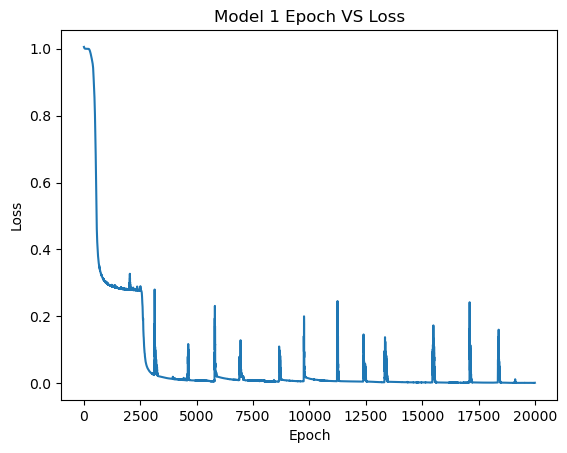

In [31]:
plt.plot(Model1epoch_array,Model1loss_array)
plt.title("Model 1 Epoch VS Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1 prediction comparison with the actual function')

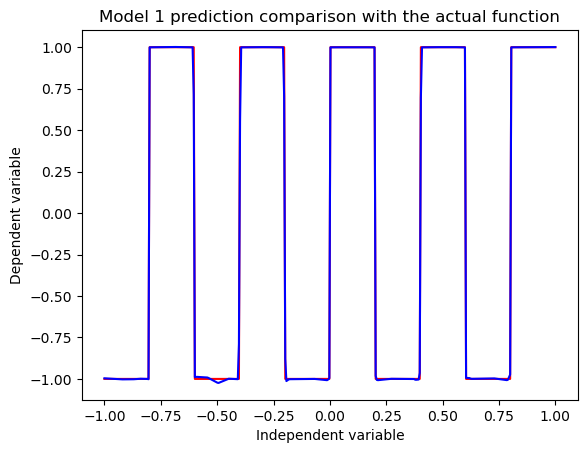

In [32]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the predicted function
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1 prediction comparison with the actual function")
           

In [33]:
class DNN2(nn.Module): #define the second deep neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 5)   #5 hidden layer
        self.hiddenlayer2 = nn.Linear(5, 12)
        self.hiddenlayer3 = nn.Linear(12, 15)
        self.hiddenlayer4 = nn.Linear(15, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)


        self.output = nn.Linear(10, 1)   #1 output layer

        
    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))

        x = self.output(x)            
        return x     
        

model2 = DNN2() #defining the model

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in DNN Model 2:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model2.state_dict():
    print(par, "\t",model2.state_dict()[par])

Number of parameters in DNN Model 2: 558

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.9524],
        [-0.4217],
        [-0.2079],
        [ 0.0165],
        [ 0.7376]])
hiddenlayer1.bias 	 tensor([ 0.0621, -0.9813,  0.4431, -0.7614,  0.0169])
hiddenlayer2.weight 	 tensor([[ 0.2432,  0.3489,  0.2378,  0.4409,  0.3024],
        [ 0.3083,  0.0683, -0.4249,  0.4095,  0.0611],
        [-0.3990, -0.0589, -0.1057, -0.1306,  0.2183],
        [ 0.0890, -0.2739, -0.1627, -0.3357, -0.1079],
        [-0.1018,  0.0190, -0.2890, -0.0006,  0.4471],
        [ 0.2026, -0.1939,  0.1224,  0.2070, -0.4360],
        [ 0.1120,  0.4376,  0.4178, -0.0627, -0.2718],
        [-0.4400,  0.1962, -0.4175,  0.1162,  0.3801],
        [ 0.3796,  0.3860,  0.2960, -0.3185,  0.0687],
        [-0.2232, -0.1764,  0.3506,  0.3655, -0.3060],
        [-0.1247, -0.3129,  0.0763, -0.2022,  0.1694],
        [ 0.1791,  0.0475, -0.3894,  0.3835,  0.3093]])
hiddenlayer2.bias 	 tensor([ 0.0244,  0.12

In [34]:
Model2epoch_array, Model2loss_array, Model2prediction = testing (model2, x, y)

epoch: 100, loss = 0.8427
epoch: 200, loss = 0.4464
epoch: 300, loss = 0.1385
epoch: 400, loss = 0.0888
epoch: 500, loss = 0.0716
epoch: 600, loss = 0.0588
epoch: 700, loss = 0.0495
epoch: 800, loss = 0.0426
epoch: 900, loss = 0.0405
epoch: 1000, loss = 0.0403
epoch: 1100, loss = 0.0328
epoch: 1200, loss = 0.0319
epoch: 1300, loss = 0.0286
epoch: 1400, loss = 0.0271
epoch: 1500, loss = 0.0676
epoch: 1600, loss = 0.0261
epoch: 1700, loss = 0.0261
epoch: 1800, loss = 0.0234
epoch: 1900, loss = 0.0691
epoch: 2000, loss = 0.0204
epoch: 2100, loss = 0.0263
epoch: 2200, loss = 0.0235
epoch: 2300, loss = 0.0181
epoch: 2400, loss = 0.0186
epoch: 2500, loss = 0.0171
epoch: 2600, loss = 0.0191
epoch: 2700, loss = 0.0173
epoch: 2800, loss = 0.0172
epoch: 2900, loss = 0.0164
epoch: 3000, loss = 0.0186
epoch: 3100, loss = 0.0156
epoch: 3200, loss = 0.0157
epoch: 3300, loss = 0.0177
epoch: 3400, loss = 0.0201
epoch: 3500, loss = 0.0142
epoch: 3600, loss = 0.0130
epoch: 3700, loss = 0.0156
epoch: 380

Text(0, 0.5, 'Loss')

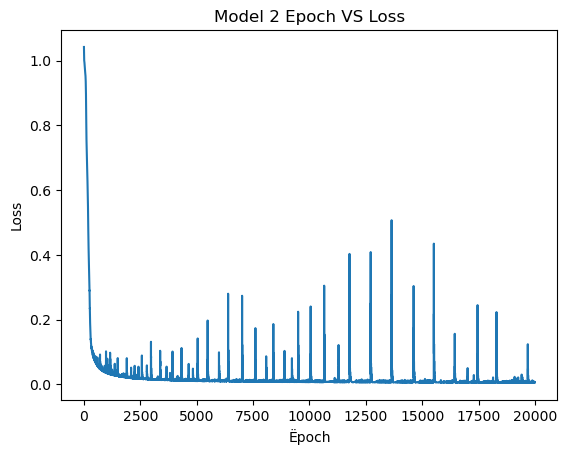

In [35]:
plt.plot(Model2epoch_array, Model2loss_array)
plt.title("Model 2 Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1 and Model 2 prediction comparison with the actual function')

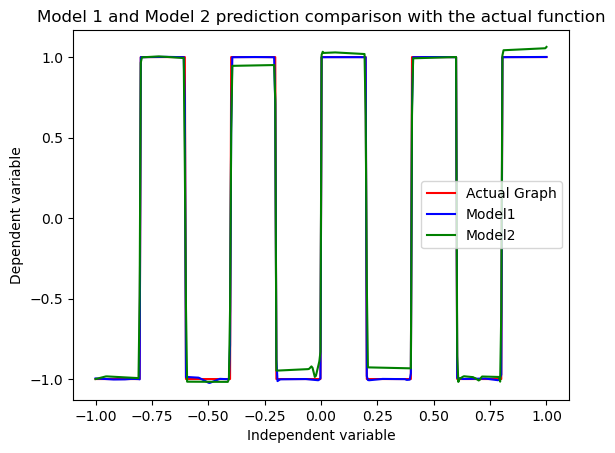

In [36]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the 1st model predicted function
plt.plot(x.numpy(), Model2prediction.data.numpy(), color= "Green") #plot the 2nd model predicted function
plt.legend(['Actual Graph', 'Model1', 'Model2'])
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1 and Model 2 prediction comparison with the actual function")

In [37]:
class SNN1(nn.Module): #define the shallow neural network model
    def __init__(self,):
        super().__init__()
        self.hiddenlayer1 = nn.Linear(1, 26)   #2 hidden layer
        self.hiddenlayer2 = nn.Linear(26, 18)

        self.output = nn.Linear(18, 1)   #1 output layer

        
    def forward(self, x): # define the activation functions for hidden layers
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))


        x = self.output(x)            
        return x     
        

model3 = SNN1() #defining the model

optimizer = torch.optim.Adam(model3.parameters(), lr=0.003, weight_decay = 0.00015)

loss_function = torch.nn.MSELoss()  #finding the Loss using MSE

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j)) #counting the total parameters
    
print('Number of parameters in SNN Model 1:', np.sum(summation),)


print("\nModel 1 weight and bias before training\n") #Getting weights & bias

for par in model3.state_dict():
    print(par, "\t",model3.state_dict()[par])

Number of parameters in SNN Model 1: 557

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.4962],
        [-0.7669],
        [ 0.6503],
        [-0.4384],
        [ 0.9127],
        [-0.9889],
        [-0.1196],
        [-0.4693],
        [-0.9426],
        [-0.5995],
        [ 0.9243],
        [ 0.3124],
        [ 0.1267],
        [ 0.9268],
        [ 0.6345],
        [ 0.8803],
        [ 0.1094],
        [ 0.1928],
        [ 0.5778],
        [ 0.7025],
        [ 0.6620],
        [ 0.4944],
        [-0.1602],
        [ 0.0177],
        [-0.5101],
        [-0.5223]])
hiddenlayer1.bias 	 tensor([-0.4975,  0.9503,  0.4414, -0.8390, -0.9370, -0.9510, -0.3862, -0.2350,
        -0.9992, -0.2532, -0.7823, -0.9612, -0.5005,  0.7241,  0.8561,  0.0160,
        -0.5151, -0.7559,  0.4082,  0.5886,  0.0147,  0.6381, -0.4301,  0.5841,
         0.7155, -0.5416])
hiddenlayer2.weight 	 tensor([[ 0.1755, -0.1345, -0.0540, -0.1573, -0.1099, -0.1127, -0.1206,  0.0805,
         -

In [38]:
Model3epoch_array, Model3loss_array, Model3prediction = testing (model3, x, y)

epoch: 100, loss = 0.8934
epoch: 200, loss = 0.7803
epoch: 300, loss = 0.7239
epoch: 400, loss = 0.6838
epoch: 500, loss = 0.6064
epoch: 600, loss = 0.4638
epoch: 700, loss = 0.4255
epoch: 800, loss = 0.4117
epoch: 900, loss = 0.4035
epoch: 1000, loss = 0.3987
epoch: 1100, loss = 0.3898
epoch: 1200, loss = 0.3137
epoch: 1300, loss = 0.2693
epoch: 1400, loss = 0.2416
epoch: 1500, loss = 0.2227
epoch: 1600, loss = 0.2107
epoch: 1700, loss = 0.1994
epoch: 1800, loss = 0.1922
epoch: 1900, loss = 0.1900
epoch: 2000, loss = 0.1820
epoch: 2100, loss = 0.1818
epoch: 2200, loss = 0.1751
epoch: 2300, loss = 0.1719
epoch: 2400, loss = 0.1697
epoch: 2500, loss = 0.1678
epoch: 2600, loss = 0.1671
epoch: 2700, loss = 0.1700
epoch: 2800, loss = 0.1630
epoch: 2900, loss = 0.1623
epoch: 3000, loss = 0.1608
epoch: 3100, loss = 0.1642
epoch: 3200, loss = 0.1603
epoch: 3300, loss = 0.1583
epoch: 3400, loss = 0.1576
epoch: 3500, loss = 0.1570
epoch: 3600, loss = 0.1586
epoch: 3700, loss = 0.1571
epoch: 380

Text(0, 0.5, 'Loss')

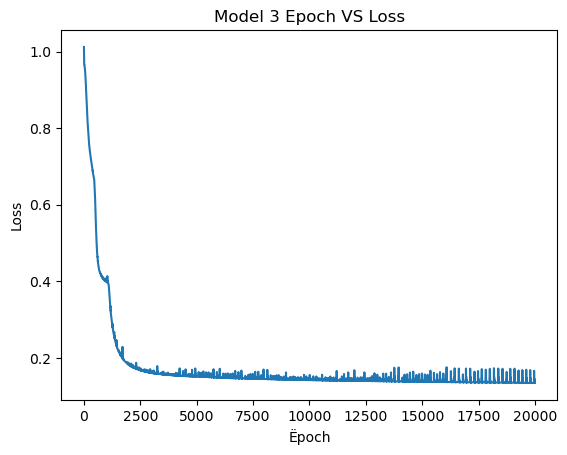

In [39]:
plt.plot(Model3epoch_array, Model3loss_array)
plt.title("Model 3 Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Model 1, 2 and 3 prediction comparison with the actual function')

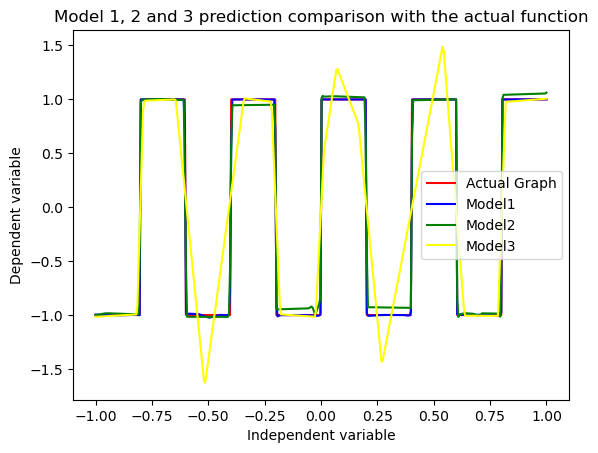

In [40]:
plt.plot(x.numpy(), y.numpy(),color= "Red") #plot original function
plt.plot(x.numpy(), Model1prediction.data.numpy(), color= "Blue") #plot the 1st model predicted function
plt.plot(x.numpy(), Model2prediction.data.numpy(), color= "Green") #plot the 2nd model predicted function
plt.plot(x.numpy(), Model3prediction.data.numpy(), color= "Yellow") #plot the 3nd model predicted function
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Model 1, 2 and 3 prediction comparison with the actual function")

Text(0, 0.5, 'Loss')

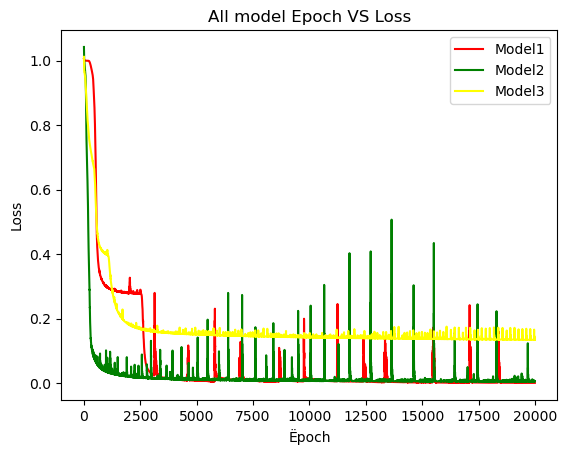

In [41]:
plt.plot(Model1epoch_array, Model1loss_array, color= "Red")
plt.plot(Model2epoch_array, Model2loss_array, color= "Green")
plt.plot(Model3epoch_array, Model3loss_array, color= "Yellow")
plt.legend(['Model1', 'Model2','Model3'])
plt.title("All model Epoch VS Loss")
plt.xlabel("Ëpoch")
plt.ylabel("Loss")